In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('./annealing_schedule.xlsx',  sheet_name='processor-annealing-schedule') 
s_vals = pd.DataFrame(data, columns=['s'])
A_vals = pd.DataFrame(data, columns=['A(s) (GHz)'])
B_vals = pd.DataFrame(data, columns=['B(s) (GHz)'])
cs_vals = pd.DataFrame(data, columns=['C (normalized)'])
new_s = s_vals.to_numpy().flatten()
new_A = A_vals.to_numpy().flatten()
new_B = B_vals.to_numpy().flatten()
new_c = cs_vals.to_numpy().flatten()

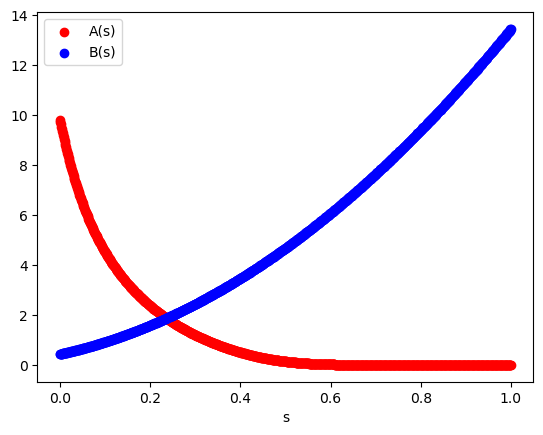

In [2]:
import matplotlib.pyplot as plt


# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_A, c = 'red', label='A(s)')
ax.scatter(new_s, new_B, c = 'blue', label='B(s)')

plt.xlabel('s')

plt.legend()

plt.show()

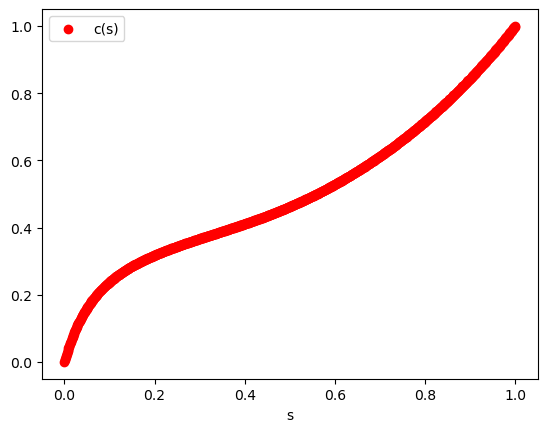

In [9]:

# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_c, c = 'red', label='c(s)')

plt.xlabel('s')

plt.legend()

plt.show()

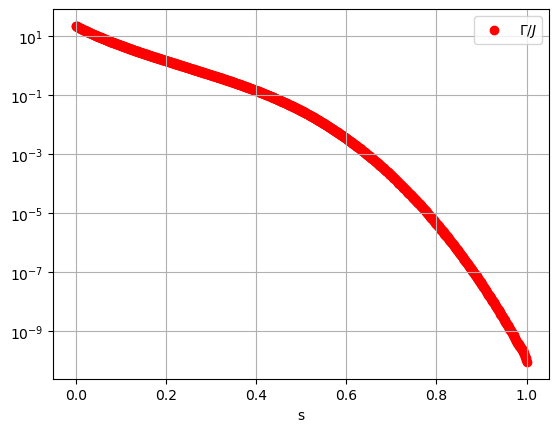

In [3]:
import matplotlib.pyplot as plt


# plot
fig, ax = plt.subplots()

ax.scatter(new_s, np.divide(new_A, new_B), c = 'red', label=r'$\Gamma/J$')
#ax.scatter(new_s, new_B, c = 'blue', label='B(s)')

plt.xlabel('s')
plt.yscale('log')
plt.legend()
plt.grid('on')
plt.show()

In [6]:
#A^2/B
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

A2divB = np.divide(new_A**2,new_B)

indices = len(new_A)*np.ones(len(new_A),dtype=np.int8)
delta_c = np.zeros(len(new_A))

for i in range(len(new_A)):
    val = find_nearest(A2divB, value = new_A[i])
    #print(val)
    indices[i] = val
    delta_c[i] = new_c[val] - new_c[i] 


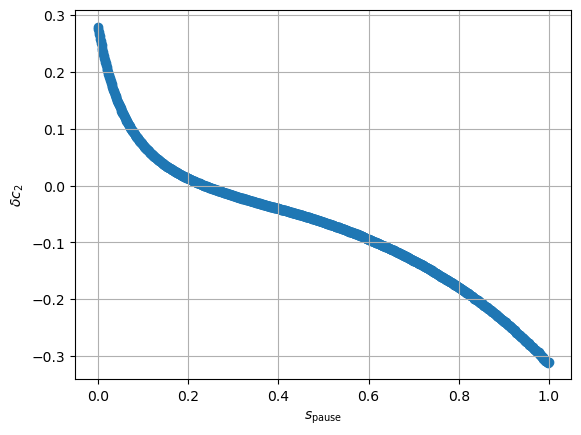

In [8]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, delta_c)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$\delta c_2$')
plt.grid()
plt.show()

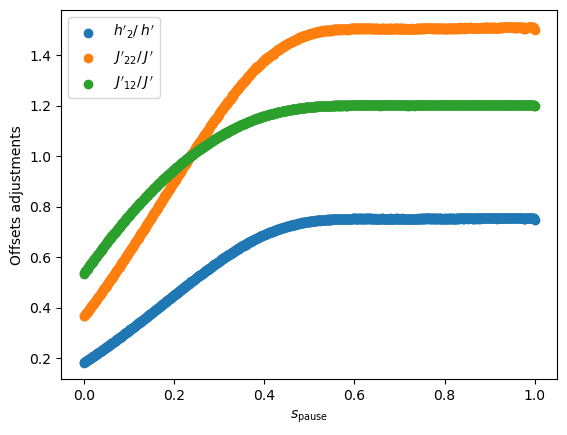

In [52]:
#h value, J_12, J_22

hoffset = np.divide(new_B,2*new_B[indices])
J22 = np.divide(new_B,new_B[indices])
J12 = np.divide(2*new_B,new_B + new_B[indices])

fig, ax = plt.subplots()

ax.scatter(new_s, hoffset, label=r"$h'_2/\:h'$")
ax.scatter(new_s, J22, label=r"$J'_{22}/\:J'$")
ax.scatter(new_s, J12, label=r"$J'_{12}/\:J'$")

plt.legend()

plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'Offsets adjustments')
plt.show()
